In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedShuffleSplit,cross_val_score, StratifiedKFold,RandomizedSearchCV
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import pyplot
from sklearn import preprocessing
import datetime
from datetime import datetime,timedelta
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor 
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Load dataset
df= pd.read_csv("C:/Users/anush/Desktop/Merilytics/incident_event_log.csv")
df.head()

number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000045       Resolved    True                   0             0   
2  INC0000045       Resolved    True                   0             0   
3  INC0000045         Closed   False                   0             0   
4  INC0000047            New    True                   0             0   

   sys_mod_count  made_sla    caller_id       opened_by        opened_at  ...  \
0              0      True  Caller 2403    Opened by  8  29-02-2016 1:16  ...   
1              2      True  Caller 2403    Opened by  8  29-02-2016 1:16  ...   
2              3      True  Caller 2403    Opened by  8  29-02-2016 1:16  ...   
3              4      True  Caller 2403    Opened by  8  29-02-2016 1:16  ...   
4              0      True  Caller 2403  Opened by  397  29-02-2016 4:40  ...   

  u_priority_confirmation         notify problem_id rfc vendor caused_by  \
0                   False  Do Not Notify          ?   ?      ?         ?   
1                   False  Do Not Notify          ?   ?      ?         ?   
2                   False  Do Not Notify          ?   ?      ?         ?   
3                   False  Do Not Notify          ?   ?      ?         ?   
4                   False  Do Not Notify          ?   ?      ?         ?   

  closed_code      resolved_by       resolved_at         closed_at  
0      code 5  Resolved by 149  29-02-2016 11:29  05-03-2016 12:00  
1      code 5  Resolved by 149  29-02-2016 11:29  05-03-2016 12:00  
2      code 5  Resolved by 149  29-02-2016 11:29  05-03-2016 12:00  
3      code 5  Resolved by 149  29-02-2016 11:29  05-03-2016 12:00  
4      code 5   Resolved by 81   01-03-2016 9:52  06-03-2016 10:00  

[5 rows x 36 columns]

In [3]:
#Datatypes
df.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

In [4]:
#Replace ? with NaN for ease of processing
df= df.replace({'?':np.NaN})
df.head()

number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000045       Resolved    True                   0             0   
2  INC0000045       Resolved    True                   0             0   
3  INC0000045         Closed   False                   0             0   
4  INC0000047            New    True                   0             0   

   sys_mod_count  made_sla    caller_id       opened_by        opened_at  ...  \
0              0      True  Caller 2403    Opened by  8  29-02-2016 1:16  ...   
1              2      True  Caller 2403    Opened by  8  29-02-2016 1:16  ...   
2              3      True  Caller 2403    Opened by  8  29-02-2016 1:16  ...   
3              4      True  Caller 2403    Opened by  8  29-02-2016 1:16  ...   
4              0      True  Caller 2403  Opened by  397  29-02-2016 4:40  ...   

  u_priority_confirmation         notify problem_id  rfc vendor caused_by  \
0                   False  Do Not Notify        NaN  NaN    NaN       NaN   
1                   False  Do Not Notify        NaN  NaN    NaN       NaN   
2                   False  Do Not Notify        NaN  NaN    NaN       NaN   
3                   False  Do Not Notify        NaN  NaN    NaN       NaN   
4                   False  Do Not Notify        NaN  NaN    NaN       NaN   

  closed_code      resolved_by       resolved_at         closed_at  
0      code 5  Resolved by 149  29-02-2016 11:29  05-03-2016 12:00  
1      code 5  Resolved by 149  29-02-2016 11:29  05-03-2016 12:00  
2      code 5  Resolved by 149  29-02-2016 11:29  05-03-2016 12:00  
3      code 5  Resolved by 149  29-02-2016 11:29  05-03-2016 12:00  
4      code 5   Resolved by 81   01-03-2016 9:52  06-03-2016 10:00  

[5 rows x 36 columns]

In [5]:
#Columns with missing values
df.isna().sum()

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              42354
sys_created_at              42354
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       64
subcategory                    97
u_symptom                   28271
cmdb_ci                    119562
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 23030
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 118061
rfc           

In [6]:
#Since the columns: cmdb_ci,problem_id,rfc,vendor,caused_by have more than 98% of the data missing, we will drop the columns
drop_cols= ['cmdb_ci','problem_id','rfc','vendor','caused_by']
df=df.drop(columns=drop_cols,axis=1)
df.head()

number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000045       Resolved    True                   0             0   
2  INC0000045       Resolved    True                   0             0   
3  INC0000045         Closed   False                   0             0   
4  INC0000047            New    True                   0             0   

   sys_mod_count  made_sla    caller_id       opened_by        opened_at  ...  \
0              0      True  Caller 2403    Opened by  8  29-02-2016 1:16  ...   
1              2      True  Caller 2403    Opened by  8  29-02-2016 1:16  ...   
2              3      True  Caller 2403    Opened by  8  29-02-2016 1:16  ...   
3              4      True  Caller 2403    Opened by  8  29-02-2016 1:16  ...   
4              0      True  Caller 2403  Opened by  397  29-02-2016 4:40  ...   

       priority assignment_group  assigned_to knowledge  \
0  3 - Moderate         Group 56          NaN      True   
1  3 - Moderate         Group 56          NaN      True   
2  3 - Moderate         Group 56          NaN      True   
3  3 - Moderate         Group 56          NaN      True   
4  3 - Moderate         Group 70  Resolver 89      True   

  u_priority_confirmation         notify closed_code      resolved_by  \
0                   False  Do Not Notify      code 5  Resolved by 149   
1                   False  Do Not Notify      code 5  Resolved by 149   
2                   False  Do Not Notify      code 5  Resolved by 149   
3                   False  Do Not Notify      code 5  Resolved by 149   
4                   False  Do Not Notify      code 5   Resolved by 81   

        resolved_at         closed_at  
0  29-02-2016 11:29  05-03-2016 12:00  
1  29-02-2016 11:29  05-03-2016 12:00  
2  29-02-2016 11:29  05-03-2016 12:00  
3  29-02-2016 11:29  05-03-2016 12:00  
4   01-03-2016 9:52  06-03-2016 10:00  

[5 rows x 31 columns]

In [7]:
#Convert alpha-numeric data to numeric
df['number']=df['number'].replace('[^0-9]','',regex=True)
df['caller_id']=df['caller_id'].replace('[^0-9]','',regex=True)
df['opened_by']=df['opened_by'].replace('[^0-9]','',regex=True)
df['sys_created_by']=df['sys_created_by'].replace('[^0-9]','',regex=True)
df['sys_updated_by']=df['sys_updated_by'].replace('[^0-9]','',regex=True)
df['location']=df['location'].replace('[^0-9]','',regex=True)
df['category']=df['category'].replace('[^0-9]','',regex=True)
df['urgency']=df['urgency'].replace('[^0-9]','',regex=True)
df['subcategory']=df['subcategory'].replace('[^0-9]','',regex=True)
df['u_symptom']=df['u_symptom'].replace('[^0-9]','',regex=True)
df['impact']=df['impact'].replace('[^0-9]','',regex=True)
df['priority']=df['priority'].replace('[^0-9]','',regex=True)
df['assignment_group']=df['assignment_group'].replace('[^0-9]','',regex=True)
df['assigned_to']=df['assigned_to'].replace('[^0-9]','',regex=True)
df['closed_code']=df['closed_code'].replace('[^0-9]','',regex=True)
df['resolved_by']=df['resolved_by'].replace('[^0-9]','',regex=True)

In [8]:
#Fill the missing values with categorical data with its mode
catg_columns= ['caller_id','opened_by','sys_created_by','location','category','u_symptom','closed_code','subcategory','assignment_group','assigned_to','resolved_by']
for column in catg_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
df.head()

number incident_state  active  reassignment_count  reopen_count  \
0  0000045            New    True                   0             0   
1  0000045       Resolved    True                   0             0   
2  0000045       Resolved    True                   0             0   
3  0000045         Closed   False                   0             0   
4  0000047            New    True                   0             0   

   sys_mod_count  made_sla caller_id opened_by        opened_at  ... priority  \
0              0      True      2403         8  29-02-2016 1:16  ...        3   
1              2      True      2403         8  29-02-2016 1:16  ...        3   
2              3      True      2403         8  29-02-2016 1:16  ...        3   
3              4      True      2403         8  29-02-2016 1:16  ...        3   
4              0      True      2403       397  29-02-2016 4:40  ...        3   

  assignment_group assigned_to knowledge u_priority_confirmation  \
0               56          17      True                   False   
1               56          17      True                   False   
2               56          17      True                   False   
3               56          17      True                   False   
4               70          89      True                   False   

          notify closed_code resolved_by       resolved_at         closed_at  
0  Do Not Notify           5         149  29-02-2016 11:29  05-03-2016 12:00  
1  Do Not Notify           5         149  29-02-2016 11:29  05-03-2016 12:00  
2  Do Not Notify           5         149  29-02-2016 11:29  05-03-2016 12:00  
3  Do Not Notify           5         149  29-02-2016 11:29  05-03-2016 12:00  
4  Do Not Notify           5          81   01-03-2016 9:52  06-03-2016 10:00  

[5 rows x 31 columns]

In [9]:
#Count of missing values per column
df.isna().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                      0
opened_by                      0
opened_at                      0
sys_created_by                 0
sys_created_at             42354
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                       0
category                       0
subcategory                    0
u_symptom                      0
impact                         0
urgency                        0
priority                       0
assignment_group               0
assigned_to                    0
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                    0
resolved_by                    0
resolved_at                 2861
closed_at 

In [10]:
#Change the datatype to datetime64
col_change_datetime = ['closed_at','opened_at','sys_created_at','sys_updated_at','resolved_at']
for i in col_change_datetime:
    df[i] = df[i].astype('datetime64[ns]')

In [11]:
#Replace missing values in column: sys_created_at with average time b/w open time and sys_created_at
temp = df[['opened_at', 'sys_created_at']]
temp = temp.dropna().astype('datetime64[ns]')
temp['gap'] = temp.sys_created_at - temp.opened_at
temp.head()

opened_at      sys_created_at             gap
0 2016-02-29 01:16:00 2016-02-29 01:23:00 0 days 00:07:00
1 2016-02-29 01:16:00 2016-02-29 01:23:00 0 days 00:07:00
2 2016-02-29 01:16:00 2016-02-29 01:23:00 0 days 00:07:00
3 2016-02-29 01:16:00 2016-02-29 01:23:00 0 days 00:07:00
4 2016-02-29 04:40:00 2016-02-29 04:57:00 0 days 00:17:00

In [12]:
import datetime
temp_mean = temp[temp.gap > datetime.timedelta(hours=0,minutes=0,seconds=0)].gap.mean()
temp_mean

Timedelta('0 days 00:15:01.925724661')

In [13]:
from datetime import timedelta
df['sys_created + temp_mean'] = df.opened_at + timedelta(minutes = 15, seconds = 01.925724661)
df.sys_created_at.fillna(value = df['sys_created + temp_mean'],inplace=True)

In [14]:
drop_cols= ['sys_created + temp_mean']
df=df.drop(columns=drop_cols,axis=1)
df.head()

number incident_state  active  reassignment_count  reopen_count  \
0  0000045            New    True                   0             0   
1  0000045       Resolved    True                   0             0   
2  0000045       Resolved    True                   0             0   
3  0000045         Closed   False                   0             0   
4  0000047            New    True                   0             0   

   sys_mod_count  made_sla caller_id opened_by           opened_at  ...  \
0              0      True      2403         8 2016-02-29 01:16:00  ...   
1              2      True      2403         8 2016-02-29 01:16:00  ...   
2              3      True      2403         8 2016-02-29 01:16:00  ...   
3              4      True      2403         8 2016-02-29 01:16:00  ...   
4              0      True      2403       397 2016-02-29 04:40:00  ...   

  priority assignment_group assigned_to knowledge u_priority_confirmation  \
0        3               56          17      True                   False   
1        3               56          17      True                   False   
2        3               56          17      True                   False   
3        3               56          17      True                   False   
4        3               70          89      True                   False   

          notify closed_code resolved_by         resolved_at  \
0  Do Not Notify           5         149 2016-02-29 11:29:00   
1  Do Not Notify           5         149 2016-02-29 11:29:00   
2  Do Not Notify           5         149 2016-02-29 11:29:00   
3  Do Not Notify           5         149 2016-02-29 11:29:00   
4  Do Not Notify           5          81 2016-01-03 09:52:00   

            closed_at  
0 2016-05-03 12:00:00  
1 2016-05-03 12:00:00  
2 2016-05-03 12:00:00  
3 2016-05-03 12:00:00  
4 2016-06-03 10:00:00  

[5 rows x 31 columns]

In [15]:
#Replace missing values in column: resolved_at with Average time between opened and resolved time
temp2 = df[['opened_at', 'resolved_at']]
temp2a = temp2.dropna()

In [16]:
warnings.filterwarnings('ignore')
temp2a.resolved_at = temp2a.resolved_at.astype('datetime64[ns]')
temp2a['new'] = temp2a.resolved_at - temp2a.opened_at
temp2a.new.mean()

Timedelta('5 days 05:34:59.468314879')

In [17]:
import datetime
df['new2'] = df['opened_at'] + datetime.timedelta(days=5, hours = 5, minutes=34, seconds=59.468314879)

In [18]:
df['resolved_at'].fillna(value = df.new2,inplace=True)

In [19]:
#Remove temporary columns created
df=df.drop(columns='new2',axis=1)

In [20]:
#Handled all the missing data
df.isna().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
closed_code                0
resolved_by                0
resolved_at                0
closed_at                  0
dtype: int64

In [21]:
#Calculate ticket life
df['ticket_life'] = (df['closed_at'] - df['opened_at']).dt.total_seconds()

In [22]:
#tickets re-opened after closing
negative_life = df[df.ticket_life<0 ]
negative_life.shape

(46336, 32)

In [23]:
#38.6% of the tickets were re-opened
perc = negative_life.shape[0]/df.shape[0]*100
perc

38.613976899615

In [24]:
#Considering only non re-opened tickets
df = df[df.ticket_life>0]
df.shape

(73662, 32)

In [25]:
#Time gap between ticket opened by the user and ticket created by the system
df['ticket_creation_sys_timegap']= (df['sys_created_at']-df['opened_at']).dt.total_seconds()
#Time gap as per different incident states
df['timediff_per_incidentstate']= (df['closed_at'] - df['sys_updated_at']).dt.total_seconds()

In [26]:
df['incident_state'].unique()


array(['New', 'Resolved', 'Closed', 'Active', 'Awaiting User Info',
       'Awaiting Problem', 'Awaiting Vendor', 'Awaiting Evidence'],
      dtype=object)

In [27]:
#Apply Label Encoder across variables with categorical data
column_list_le = ['incident_state','active','made_sla','caller_id','opened_by','sys_created_by','sys_updated_by','contact_type',
                 'location','category','subcategory','u_symptom','impact','urgency','priority','assignment_group','knowledge',
                 'u_priority_confirmation','notify','closed_code','resolved_by']
le = LabelEncoder()
df[column_list_le] = df[column_list_le].apply(LabelEncoder().fit_transform)
df.head()

number  incident_state  active  reassignment_count  reopen_count  \
0  0000045               6       1                   0             0   
1  0000045               7       1                   0             0   
2  0000045               7       1                   0             0   
3  0000045               5       0                   0             0   
4  0000047               6       1                   0             0   

   sys_mod_count  made_sla  caller_id  opened_by           opened_at  ...  \
0              0         1       1097        139 2016-02-29 01:16:00  ...   
1              2         1       1097        139 2016-02-29 01:16:00  ...   
2              3         1       1097        139 2016-02-29 01:16:00  ...   
3              4         1       1097        139 2016-02-29 01:16:00  ...   
4              0         1       1097         86 2016-02-29 04:40:00  ...   

   knowledge u_priority_confirmation  notify closed_code  resolved_by  \
0          1                       0       0          11           47   
1          1                       0       0          11           47   
2          1                       0       0          11           47   
3          1                       0       0          11           47   
4          1                       0       0          11          164   

          resolved_at           closed_at  ticket_life  \
0 2016-02-29 11:29:00 2016-05-03 12:00:00    5568240.0   
1 2016-02-29 11:29:00 2016-05-03 12:00:00    5568240.0   
2 2016-02-29 11:29:00 2016-05-03 12:00:00    5568240.0   
3 2016-02-29 11:29:00 2016-05-03 12:00:00    5568240.0   
4 2016-01-03 09:52:00 2016-06-03 10:00:00    8227200.0   

   ticket_creation_sys_timegap  timediff_per_incidentstate  
0                        420.0                   5567820.0  
1                        420.0                   5540820.0  
2                        420.0                   5531460.0  
3                        420.0                         0.0  
4                       1020.0                   8226180.0  

[5 rows x 34 columns]

In [29]:
df['number']=df['number'].astype('int')
df['assigned_to']=df['assigned_to'].astype('int')
df.dtypes

number                                  int32
incident_state                          int32
active                                  int64
reassignment_count                      int64
reopen_count                            int64
sys_mod_count                           int64
made_sla                                int64
caller_id                               int32
opened_by                               int32
opened_at                      datetime64[ns]
sys_created_by                          int32
sys_created_at                 datetime64[ns]
sys_updated_by                          int32
sys_updated_at                 datetime64[ns]
contact_type                            int32
location                                int32
category                                int32
subcategory                             int32
u_symptom                               int32
impact                                  int32
urgency                                 int32
priority                          

In [30]:
#Normalize the data
scaler = preprocessing.MinMaxScaler()
df[['number','reassignment_count','sys_mod_count','caller_id','opened_by','sys_created_by','sys_updated_by','location','category','subcategory','assignment_group','assigned_to','closed_code','resolved_by','ticket_creation_sys_timegap','timediff_per_incidentstate','ticket_life']] = scaler.fit_transform(df[['number','reassignment_count','sys_mod_count','caller_id','opened_by','sys_created_by','sys_updated_by','location','category','subcategory','assignment_group','assigned_to','closed_code','resolved_by','ticket_creation_sys_timegap','timediff_per_incidentstate','ticket_life']])
df[['number','reassignment_count','sys_mod_count','caller_id','opened_by','sys_created_by','sys_updated_by','location','category','subcategory','assignment_group','assigned_to','closed_code','resolved_by','ticket_creation_sys_timegap','timediff_per_incidentstate','ticket_life']]= df[['number','reassignment_count','sys_mod_count','caller_id','opened_by','sys_created_by','sys_updated_by','location','category','subcategory','assignment_group','assigned_to','closed_code','resolved_by','ticket_creation_sys_timegap','timediff_per_incidentstate','ticket_life']].round(3)
df.head()

number  incident_state  active  reassignment_count  reopen_count  \
0     0.0               6       1                 0.0             0   
1     0.0               7       1                 0.0             0   
2     0.0               7       1                 0.0             0   
3     0.0               5       0                 0.0             0   
4     0.0               6       1                 0.0             0   

   sys_mod_count  made_sla  caller_id  opened_by           opened_at  ...  \
0          0.000         1       0.27      0.972 2016-02-29 01:16:00  ...   
1          0.016         1       0.27      0.972 2016-02-29 01:16:00  ...   
2          0.023         1       0.27      0.972 2016-02-29 01:16:00  ...   
3          0.031         1       0.27      0.972 2016-02-29 01:16:00  ...   
4          0.000         1       0.27      0.601 2016-02-29 04:40:00  ...   

   knowledge u_priority_confirmation  notify closed_code  resolved_by  \
0          1                       0       0       0.733        0.261   
1          1                       0       0       0.733        0.261   
2          1                       0       0       0.733        0.261   
3          1                       0       0       0.733        0.261   
4          1                       0       0       0.733        0.911   

          resolved_at           closed_at  ticket_life  \
0 2016-02-29 11:29:00 2016-05-03 12:00:00        0.107   
1 2016-02-29 11:29:00 2016-05-03 12:00:00        0.107   
2 2016-02-29 11:29:00 2016-05-03 12:00:00        0.107   
3 2016-02-29 11:29:00 2016-05-03 12:00:00        0.107   
4 2016-01-03 09:52:00 2016-06-03 10:00:00        0.158   

   ticket_creation_sys_timegap  timediff_per_incidentstate  
0                        0.315                       0.406  
1                        0.315                       0.406  
2                        0.315                       0.406  
3                        0.315                       0.335  
4                        0.335                       0.440  

[5 rows x 34 columns]

In [31]:
drop_org_dates=['opened_at','sys_created_at','sys_updated_at','resolved_at','closed_at']
df1 = df.drop(columns = drop_org_dates, axis=1)
df1.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'sys_created_by', 'sys_updated_by', 'contact_type', 'location',
       'category', 'subcategory', 'u_symptom', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'closed_code', 'resolved_by',
       'ticket_life', 'ticket_creation_sys_timegap',
       'timediff_per_incidentstate'],
      dtype='object')

In [32]:
#Moving the predictor label to the last column
cols=['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'sys_created_by', 'sys_updated_by', 'contact_type', 'location',
       'category', 'subcategory', 'u_symptom', 'impact', 'urgency',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'closed_code', 'resolved_by',
       'ticket_life', 'ticket_creation_sys_timegap',
       'timediff_per_incidentstate','priority']
df1= df1.reindex(columns=cols)
df1

number  incident_state  active  reassignment_count  reopen_count  \
0          0.0               6       1                 0.0             0   
1          0.0               7       1                 0.0             0   
2          0.0               7       1                 0.0             0   
3          0.0               5       0                 0.0             0   
4          0.0               6       1                 0.0             0   
...        ...             ...     ...                 ...           ...   
119993     1.0               7       1                 0.0             0   
119994     1.0               5       0                 0.0             0   
119995     1.0               7       1                 0.0             0   
119996     1.0               5       0                 0.0             0   
119997     1.0               6       1                 0.0             0   

        sys_mod_count  made_sla  caller_id  opened_by  sys_created_by  ...  \
0               0.000         1      0.270      0.972           0.829  ...   
1               0.016         1      0.270      0.972           0.829  ...   
2               0.023         1      0.270      0.972           0.829  ...   
3               0.031         1      0.270      0.972           0.829  ...   
4               0.000         1      0.270      0.601           0.329  ...   
...               ...       ...        ...        ...             ...  ...   
119993          0.062         1      0.254      0.133           0.007  ...   
119994          0.070         1      0.254      0.133           0.007  ...   
119995          0.000         1      0.550      0.021           0.007  ...   
119996          0.008         1      0.550      0.021           0.007  ...   
119997          0.000         1      0.393      0.133           0.007  ...   

        assigned_to  knowledge  u_priority_confirmation  notify  closed_code  \
0             0.060          1                        0       0        0.733   
1             0.060          1                        0       0        0.733   
2             0.060          1                        0       0        0.733   
3             0.060          1                        0       0        0.733   
4             0.347          1                        0       0        0.733   
...             ...        ...                      ...     ...          ...   
119993        0.044          0                        1       0        0.867   
119994        0.044          0                        1       0        0.867   
119995        0.215          0                        0       0        0.800   
119996        0.215          0                        0       0        0.800   
119997        0.060          0                        0       0        0.800   

        resolved_by  ticket_life  ticket_creation_sys_timegap  \
0             0.261        0.107                        0.315   
1             0.261        0.107                        0.315   
2             0.261        0.107                        0.315   
3             0.261        0.107                        0.315   
4             0.911        0.158                        0.335   
...             ...          ...                          ...   
119993        0.056        0.008                        0.331   
119994        0.056        0.008                        0.331   
119995        0.806        0.008                        0.331   
119996        0.806        0.008                        0.331   
119997        0.417        0.015                        0.331   

        timediff_per_incidentstate  priority  
0                            0.406         2  
1                            0.406         2  
2                            0.406         2  
3                            0.335         2  
4                            0.440         2  
...                            ...       ...  
119993                       0.341         2  
119994                       0.335      

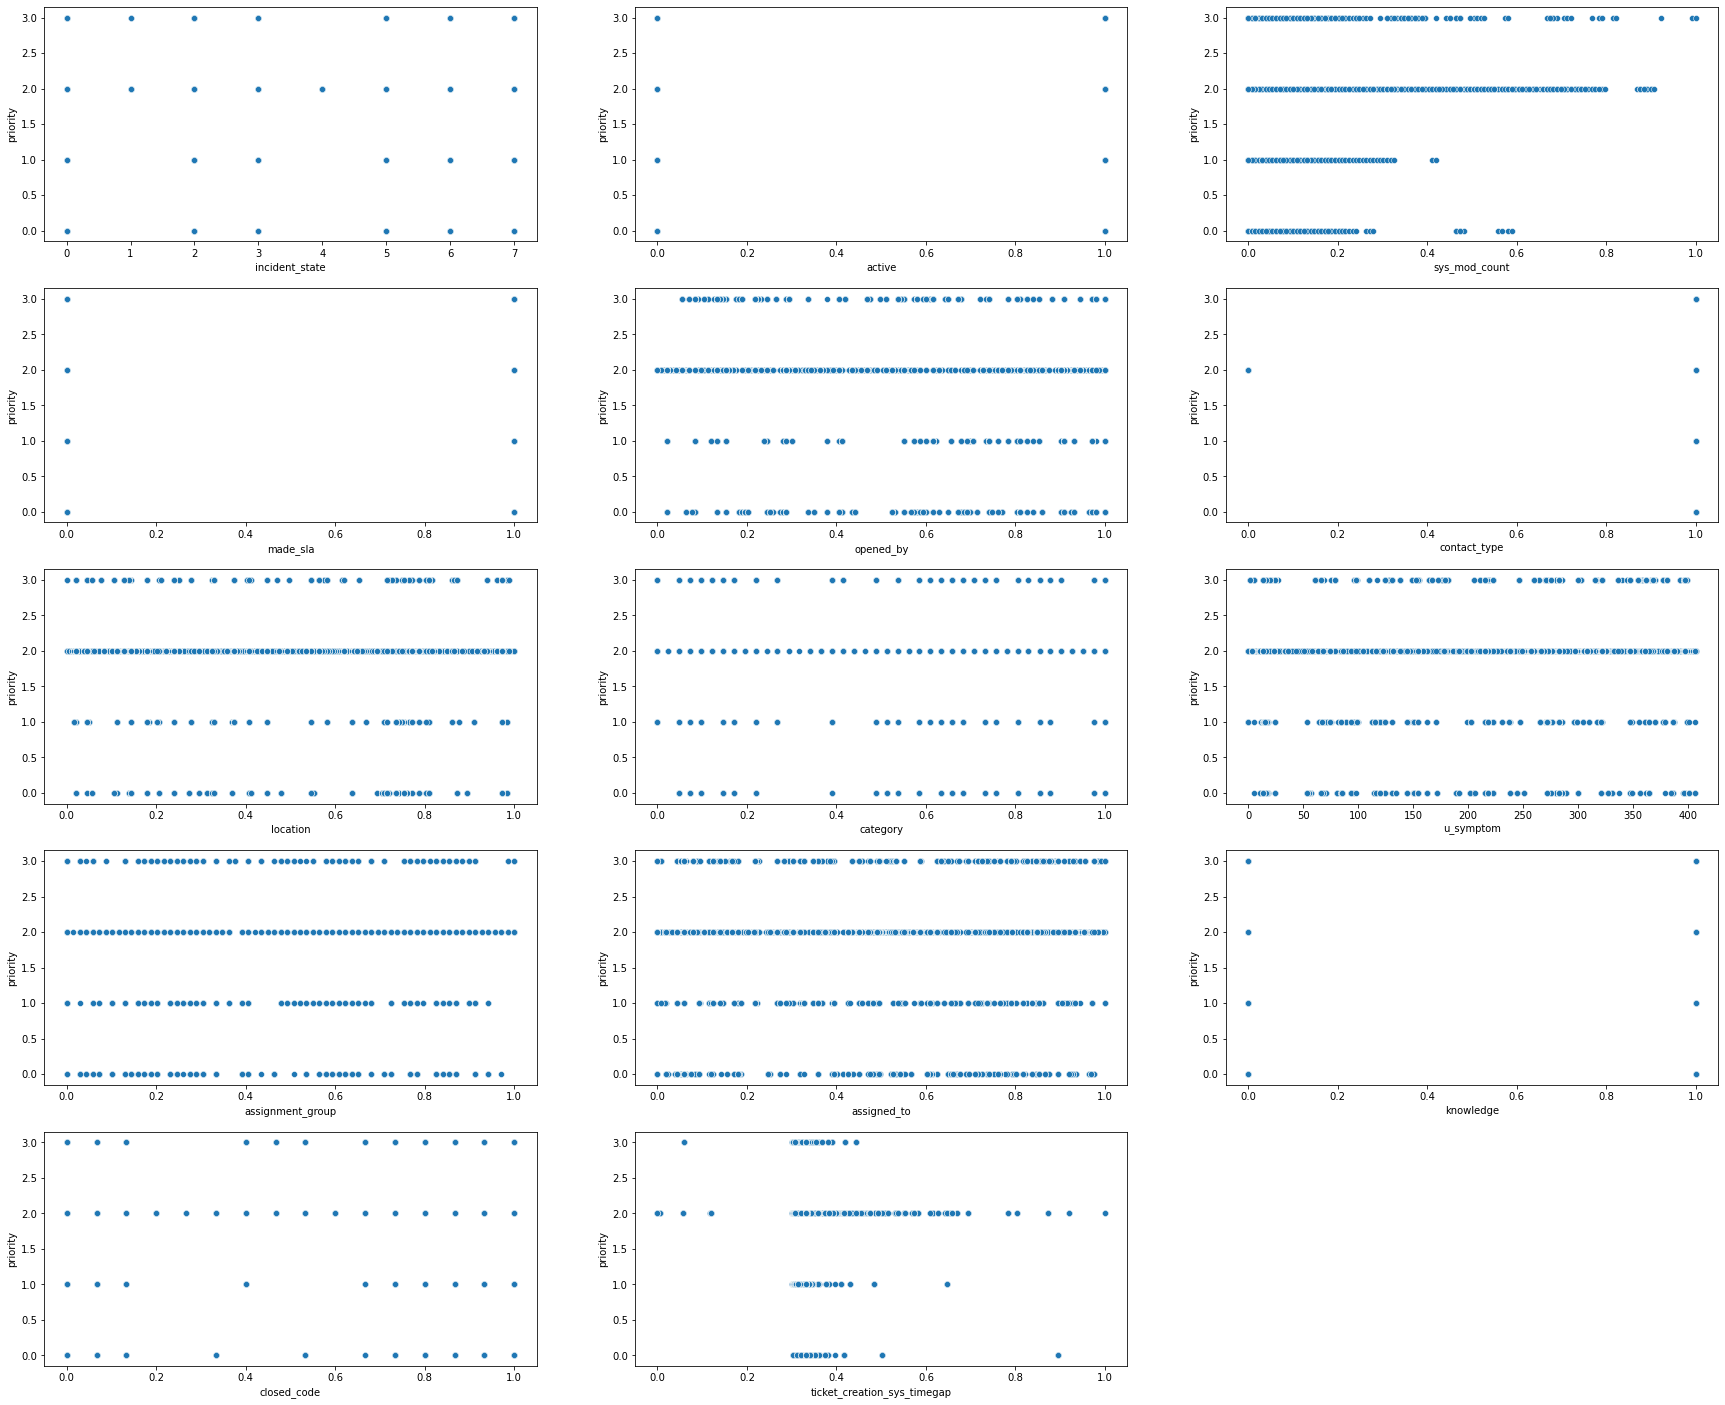

In [33]:
#Classification model: #Plot each feature against dependent variable
features_to_plot_cls= ['incident_state','active','sys_mod_count','made_sla','opened_by','contact_type',
                   'location','category','u_symptom','assignment_group','assigned_to','knowledge','closed_code','ticket_creation_sys_timegap']
count=1
plt.subplots(figsize=(30,25))
for i in features_to_plot_cls:
    plt.subplot(5,3,count)
    sns.scatterplot(df1[i],df1["priority"])
    count+=1

plt.show()

In [34]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

<AxesSubplot:>

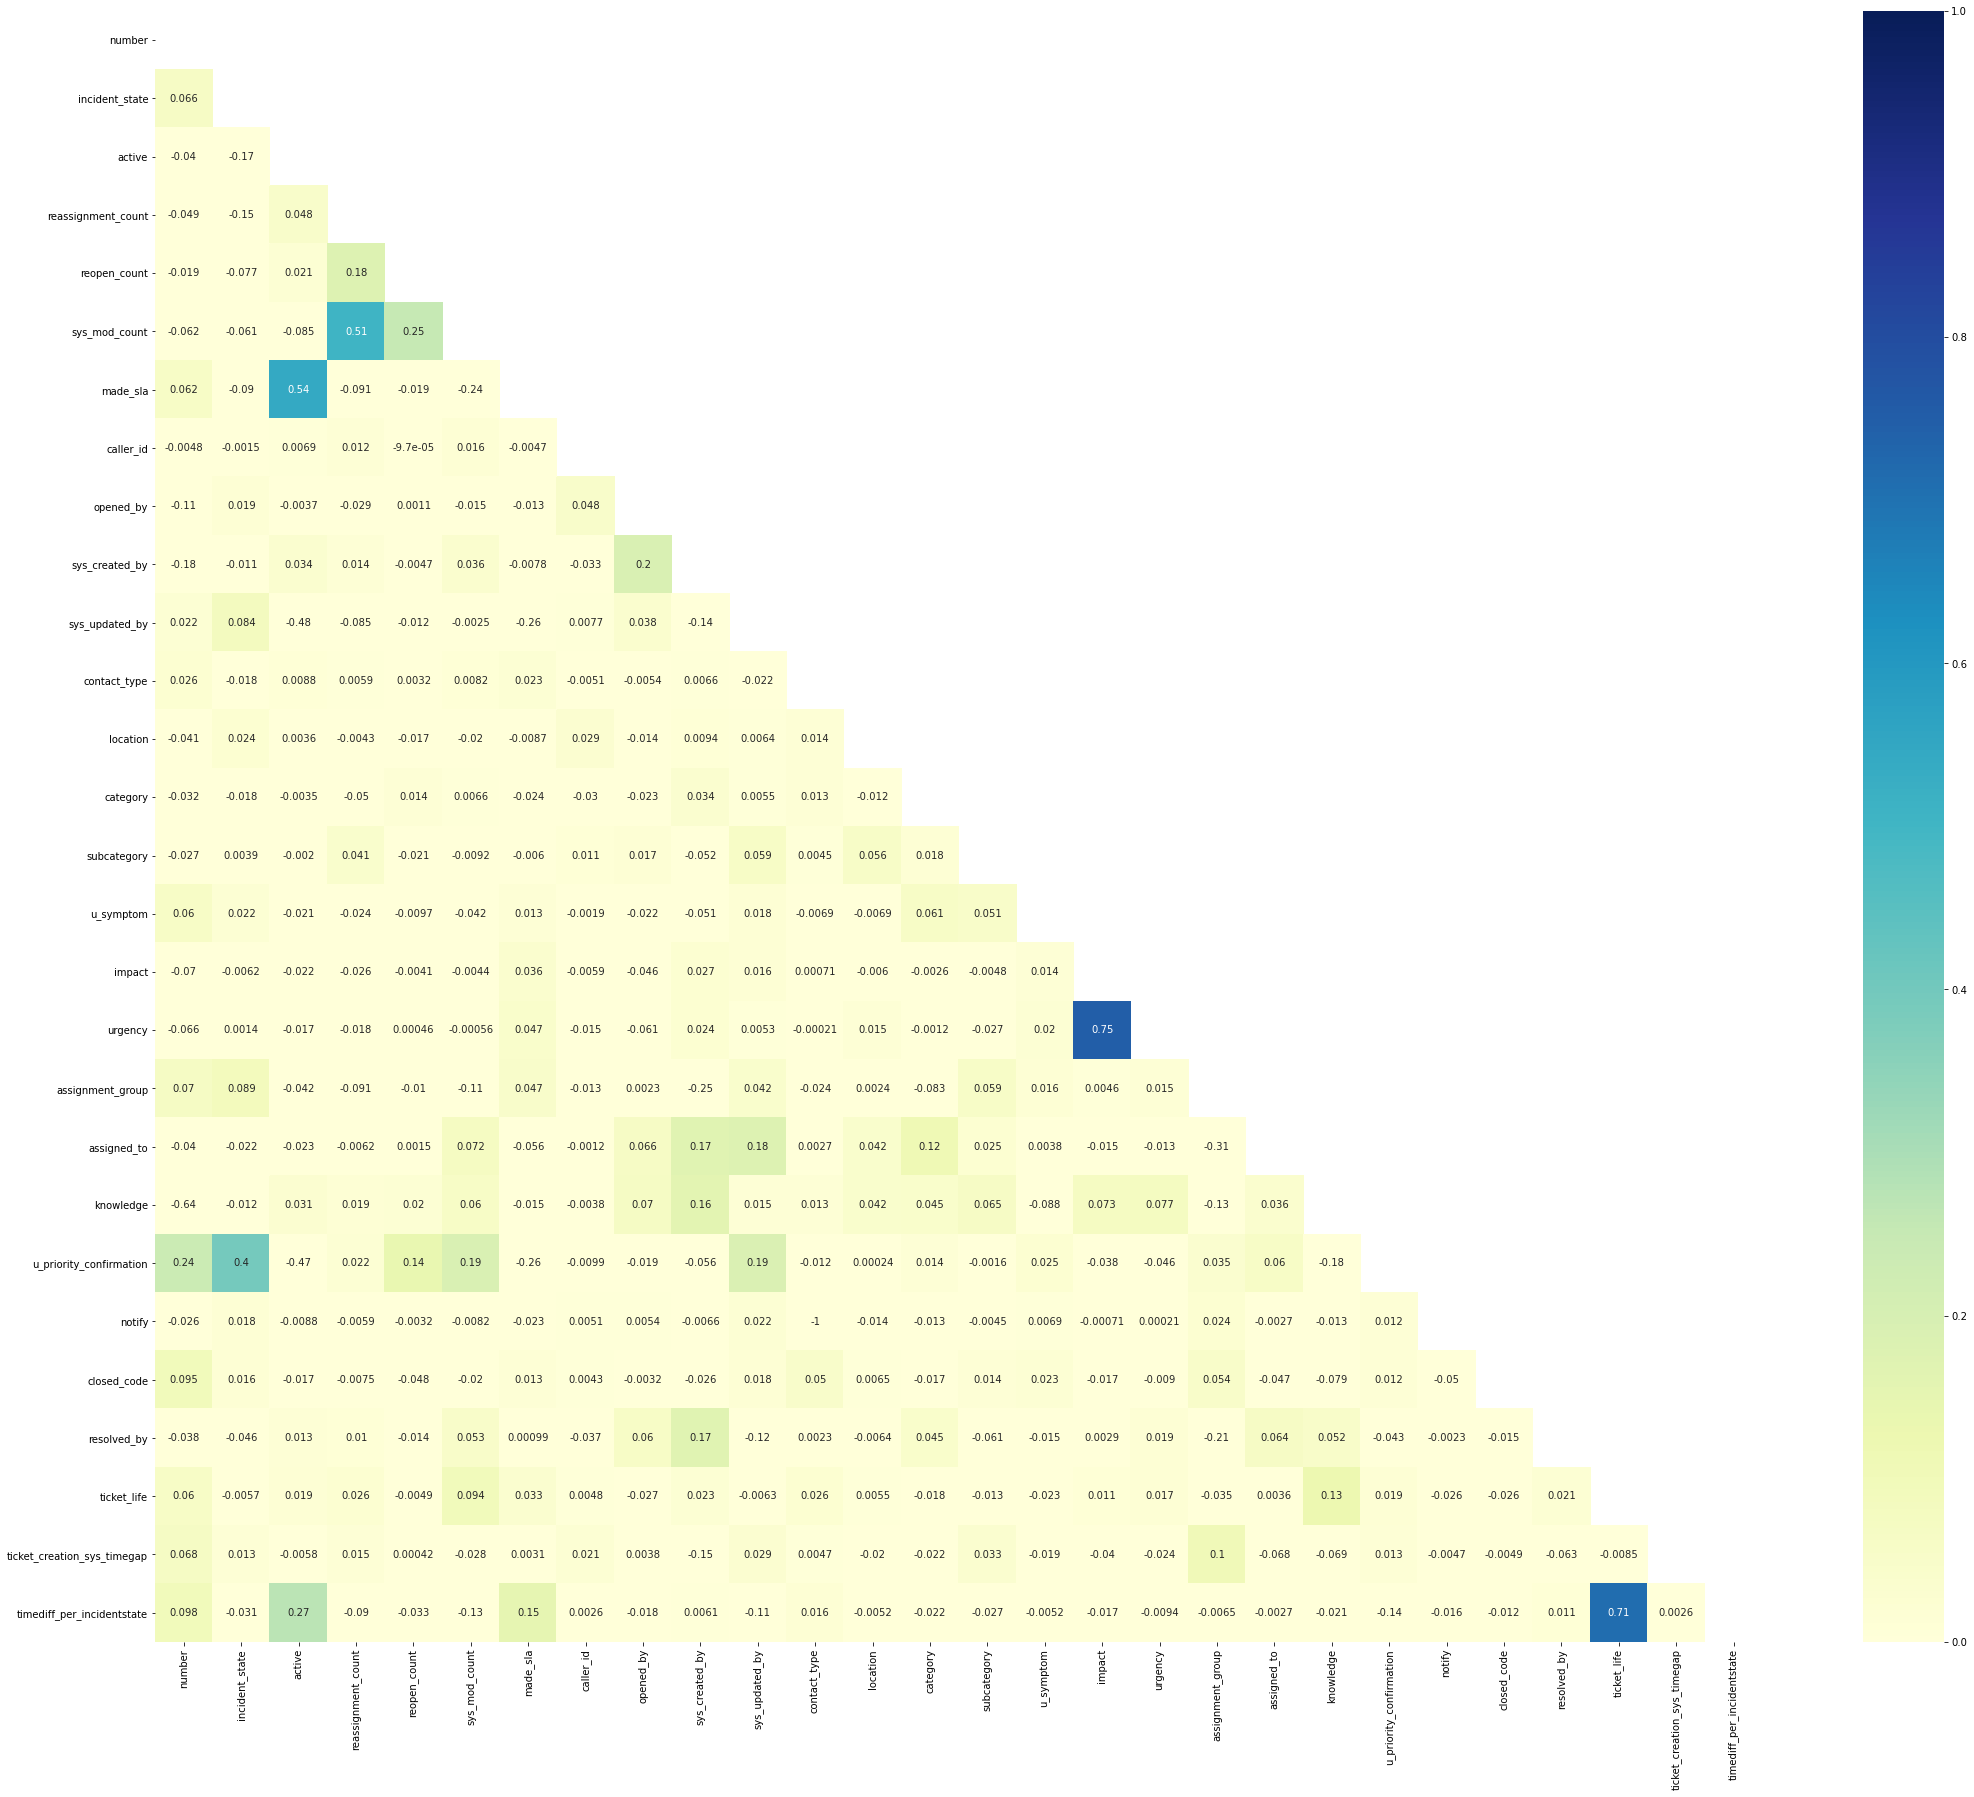

In [35]:
#Heatmap for correlation matrix to check for multicollinearity between independent variables
corr = X.corr()
f, ax = plt.subplots(figsize=(36,30))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Draw the heatmap
sns.heatmap(corr, annot=True, mask=mask, cmap="YlGnBu",vmin=0, vmax=1,xticklabels=1, yticklabels=1)

In [36]:
#dropping features with correlation>0.7
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(to_drop)

['urgency', 'notify', 'timediff_per_incidentstate']


In [37]:
# Drop features, ignoring the dates
cols_to_drop1 = ['urgency', 'notify','ticket_life']
X_fin= X.drop(columns=cols_to_drop1, axis=1)
X_fin.head()

number  incident_state  active  reassignment_count  reopen_count  \
0     0.0               6       1                 0.0             0   
1     0.0               7       1                 0.0             0   
2     0.0               7       1                 0.0             0   
3     0.0               5       0                 0.0             0   
4     0.0               6       1                 0.0             0   

   sys_mod_count  made_sla  caller_id  opened_by  sys_created_by  ...  \
0          0.000         1       0.27      0.972           0.829  ...   
1          0.016         1       0.27      0.972           0.829  ...   
2          0.023         1       0.27      0.972           0.829  ...   
3          0.031         1       0.27      0.972           0.829  ...   
4          0.000         1       0.27      0.601           0.329  ...   

   u_symptom  impact  assignment_group  assigned_to  knowledge  \
0        389       1             0.623        0.060          1   
1        389       1             0.623        0.060          1   
2        389       1             0.623        0.060          1   
3        389       1             0.623        0.060          1   
4        273       1             0.841        0.347          1   

   u_priority_confirmation  closed_code  resolved_by  \
0                        0        0.733        0.261   
1                        0        0.733        0.261   
2                        0        0.733        0.261   
3                        0        0.733        0.261   
4                        0        0.733        0.911   

   ticket_creation_sys_timegap  timediff_per_incidentstate  
0                        0.315                       0.406  
1                        0.315                       0.406  
2                        0.315                       0.406  
3                        0.315                       0.335  
4                        0.335                       0.440  

[5 rows x 25 columns]

In [38]:
#applying stratification to get 10% of the data
ss = StratifiedShuffleSplit(n_splits=1, train_size=0.1, random_state=50)
for train_index, test_index in ss.split(X_fin, y):
    trainX, trainY = X_fin.iloc[train_index], y.iloc[train_index]
trainX.shape,trainY.shape

((7366, 25), (7366,))

In [39]:
X_train, X_test, y_train, y_test= train_test_split(trainX,trainY,test_size=0.25)

In [40]:
#Initial model: Decision Tree Classifier without any hyperparameters
init_model_DTC= DecisionTreeClassifier(random_state=42)
init_model_DTC_fit= init_model_DTC.fit(X_train,y_train)
#Test the model on the entire dataset
pred_values_DTC = init_model_DTC.predict(X_fin)

In [41]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(150,150))
    Tree = tree.plot_tree(dt_classifier,
                       feature_names=trainX.columns,
                       class_names=['1 - Critical', '2 - High','3 - Moderate','4 - Low'],
                       filled=True, fontsize=15)
gph = get_dt_graph(init_model_DTC)

In [42]:
#Test the model on the entire dataset
f1_DTC= f1_score(y, pred_values_DTC, average='weighted')
f1_DTC

0.9759834140256686

In [43]:
#Test the model on the entire dataset
CM_DTC = confusion_matrix(y, pred_values_DTC)

In [44]:
cm_df_dtc = pd.DataFrame(CM_DTC,
                     index = ['1 - Critical','2 - High','3 - Moderate','4 - Low'], 
                     columns = ['1 - Critical','2 - High','3 - Moderate','4 - Low'])

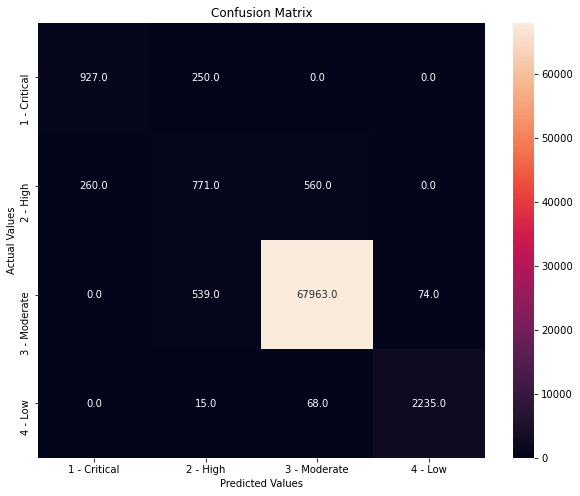

In [45]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df_dtc, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [46]:
alpha_vals= np.linspace(0,1,10)

In [47]:
#Hyper parameter tuning for "DecisionTreeClassifier"
params_dtc = {
    'max_depth': range(2,10),
    'min_samples_leaf': range(2,10),
    'criterion': ["gini", "entropy"],
    'max_leaf_nodes': range(150,250,10),
    'ccp_alpha': alpha_vals}

In [48]:
grid_search_dtc = GridSearchCV(estimator=init_model_DTC, 
                           param_grid=params_dtc, 
                           cv=2, n_jobs=-1, verbose=1, scoring = "f1_weighted")
result= grid_search_dtc.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Fitting 2 folds for each of 12800 candidates, totalling 25600 fits
Best: 0.977156 using {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 150, 'min_samples_leaf': 5}


In [49]:
criterion=  result.best_params_['criterion']
min_samples_leaf= result.best_params_['min_samples_leaf']
max_depth= result.best_params_['max_depth']
ccp_alpha= result.best_params_['ccp_alpha']
max_leaf_nodes= result.best_params_['max_leaf_nodes']

In [50]:
#Tuned model
Tuned_DTC = DecisionTreeClassifier(criterion= criterion, min_samples_leaf= min_samples_leaf, max_depth= max_depth, ccp_alpha=ccp_alpha, max_leaf_nodes= max_leaf_nodes).fit(X_train, y_train)
#Test the model on the entire dataset
pred_values_tuned = Tuned_DTC.predict(X_fin)

In [51]:
#Test the model on the entire dataset
f1_DTC_1= f1_score(y, pred_values_tuned, average='weighted')
f1_DTC_1

0.976182209711092

In [52]:
#Test the model on the entire dataset
CM_DTC_Tuned = confusion_matrix(y, pred_values_tuned)

In [53]:
cm_df_dtc_tuned = pd.DataFrame(CM_DTC_Tuned,
                     index = ['1 - Critical','2 - High','3 - Moderate','4 - Low'], 
                     columns = ['1 - Critical','2 - High','3 - Moderate','4 - Low'])

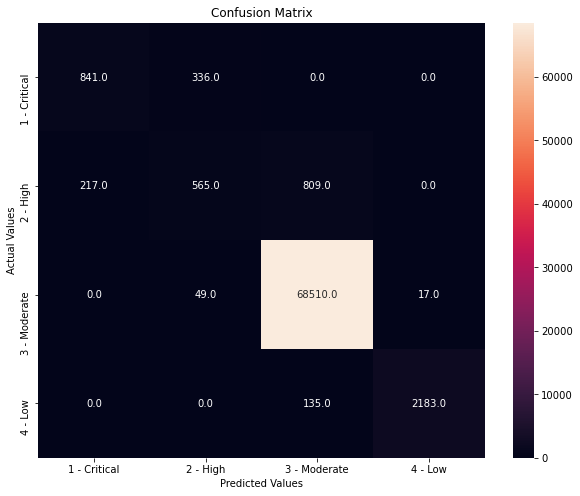

In [54]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df_dtc_tuned, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [55]:
svm_model = SVC()
svm_model_fit= svm_model.fit(X_train,y_train)
#Test the model on the entire dataset
svm_predictions = svm_model.predict(X_fin)

In [56]:
#Test the model on the entire dataset
CM_SVM = confusion_matrix(y, svm_predictions)

In [57]:
#Test the model on the entire dataset
f1_SVM= f1_score(y, svm_predictions, average='weighted')
f1_SVM

0.8976667749520543

In [58]:
cm_df_svm = pd.DataFrame(CM_SVM,
                     index = ['1 - Critical','2 - High','3 - Moderate','4 - Low'], 
                     columns = ['1 - Critical','2 - High','3 - Moderate','4 - Low'])

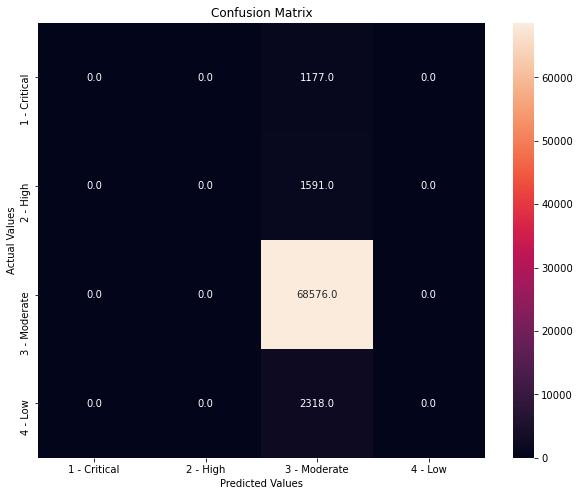

In [59]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df_svm, annot=True, fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [60]:
#Hyper parameter tuning for "Support Vector Classifier"
gamma_vals= np.linspace(0,1,20)
param_grid_svc = {'C': range(1000,10000,1000),
              'gamma': gamma_vals
              }

In [61]:
grid_search_svc = GridSearchCV(estimator=svm_model, 
                           param_grid=param_grid_svc, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "f1_weighted")
result_svc= grid_search_svc.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


In [62]:
# summarize results
print("Best: %f using %s" % (result_svc.best_score_, result_svc.best_params_))

Best: 0.957148 using {'C': 1000, 'gamma': 0.05263157894736842}


In [63]:
C1= result_svc.best_params_['C']
gamma= result_svc.best_params_['gamma']

In [64]:
#Tuned model
Tuned_SVC = SVC(C= C1,gamma = gamma,kernel = 'rbf',class_weight='balanced').fit(X_train, y_train)
pred_values_tuned_SVC = Tuned_SVC.predict(X_fin)

In [65]:
#Test the model on the entire dataset
f1_SVC_1= f1_score(y, pred_values_tuned_SVC, average='weighted')
f1_SVC_1

0.9601163473713276

In [66]:
#Test the model on the entire dataset
CM_SVC_Tuned = confusion_matrix(y, pred_values_tuned_SVC)

In [67]:
cm_df_svc_tuned = pd.DataFrame(CM_SVC_Tuned,
                     index = ['1 - Critical','2 - High','3 - Moderate','4 - Low'], 
                     columns = ['1 - Critical','2 - High','3 - Moderate','4 - Low'])

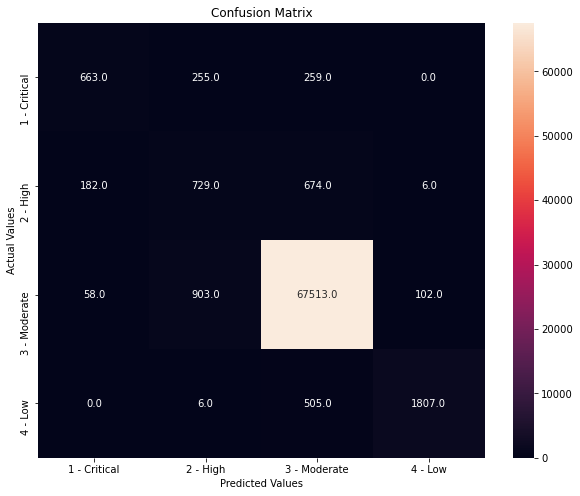

In [68]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df_svc_tuned, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [69]:
#Start of regression model
#Moving the predictor label to the last column
cols=['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'sys_created_by', 'sys_updated_by', 'contact_type', 'location',
       'category', 'subcategory', 'u_symptom', 'impact', 'urgency',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'closed_code', 'resolved_by',
       'ticket_life', 'ticket_creation_sys_timegap',
       'priority','timediff_per_incidentstate']
df1= df.reindex(columns=cols)
df1

number  incident_state  active  reassignment_count  reopen_count  \
0          0.0               6       1                 0.0             0   
1          0.0               7       1                 0.0             0   
2          0.0               7       1                 0.0             0   
3          0.0               5       0                 0.0             0   
4          0.0               6       1                 0.0             0   
...        ...             ...     ...                 ...           ...   
119993     1.0               7       1                 0.0             0   
119994     1.0               5       0                 0.0             0   
119995     1.0               7       1                 0.0             0   
119996     1.0               5       0                 0.0             0   
119997     1.0               6       1                 0.0             0   

        sys_mod_count  made_sla  caller_id  opened_by  sys_created_by  ...  \
0               0.000         1      0.270      0.972           0.829  ...   
1               0.016         1      0.270      0.972           0.829  ...   
2               0.023         1      0.270      0.972           0.829  ...   
3               0.031         1      0.270      0.972           0.829  ...   
4               0.000         1      0.270      0.601           0.329  ...   
...               ...       ...        ...        ...             ...  ...   
119993          0.062         1      0.254      0.133           0.007  ...   
119994          0.070         1      0.254      0.133           0.007  ...   
119995          0.000         1      0.550      0.021           0.007  ...   
119996          0.008         1      0.550      0.021           0.007  ...   
119997          0.000         1      0.393      0.133           0.007  ...   

        assigned_to  knowledge  u_priority_confirmation  notify  closed_code  \
0             0.060          1                        0       0        0.733   
1             0.060          1                        0       0        0.733   
2             0.060          1                        0       0        0.733   
3             0.060          1                        0       0        0.733   
4             0.347          1                        0       0        0.733   
...             ...        ...                      ...     ...          ...   
119993        0.044          0                        1       0        0.867   
119994        0.044          0                        1       0        0.867   
119995        0.215          0                        0       0        0.800   
119996        0.215          0                        0       0        0.800   
119997        0.060          0                        0       0        0.800   

        resolved_by  ticket_life  ticket_creation_sys_timegap  priority  \
0             0.261        0.107                        0.315         2   
1             0.261        0.107                        0.315         2   
2             0.261        0.107                        0.315         2   
3             0.261        0.107                        0.315         2   
4             0.911        0.158                        0.335         2   
...             ...          ...                          ...       ...   
119993        0.056        0.008                        0.331         2   
119994        0.056        0.008                        0.331         2   
119995        0.806        0.008                        0.331         2   
119996        0.806        0.008                        0.331         2   
119997        0.417        0.015                        0.331         2   

        timediff_per_incidentstate  
0                            0.406  
1                            0.406  
2                            0.406  
3                            0.335  
4                            0.440  
...                            ...  
119993                       0.341  


In [70]:
# Keeping records only with incident_state as "New & Active", since only these 2 states would account for the total resolution
# time for the incident
indexNames = df1[df1['incident_state']==7].index
df1.drop(indexNames, inplace=True)
indexNames = df1[df1['incident_state']==5].index
df1.drop(indexNames, inplace=True)
indexNames = df1[df1['incident_state']==3].index
df1.drop(indexNames, inplace=True)
indexNames = df1[df1['incident_state']==2].index
df1.drop(indexNames, inplace=True)
indexNames = df1[df1['incident_state']==4].index
df1.drop(indexNames, inplace=True)
indexNames = df1[df1['incident_state']==1].index
df1.drop(indexNames, inplace=True)

In [71]:
df1.shape

(38543, 29)

In [72]:
# Keeping only those columns with similar row values so calculation of resolution time using groupby() is easier
df1['incident_state'].unique()

array([6, 0])

In [73]:
df2= df1[['number','active','reopen_count','made_sla','caller_id','opened_by','sys_created_by','contact_type','location',
          'category','subcategory','u_symptom','priority','knowledge','u_priority_confirmation',
          'closed_code','resolved_by','timediff_per_incidentstate']].copy()
df2

number  active  reopen_count  made_sla  caller_id  opened_by  \
0          0.0       1             0         1      0.270      0.972   
4          0.0       1             0         1      0.270      0.601   
5          0.0       1             0         1      0.270      0.601   
6          0.0       1             0         1      0.270      0.601   
7          0.0       1             0         1      0.270      0.601   
...        ...     ...           ...       ...        ...        ...   
119985     1.0       1             0         1      0.140      0.084   
119988     1.0       1             0         1      0.858      0.406   
119991     1.0       1             0         1      0.254      0.133   
119992     1.0       1             0         1      0.254      0.133   
119997     1.0       1             0         1      0.393      0.133   

        sys_created_by  contact_type  location  category  subcategory  \
0                0.829             1     0.179     0.805        0.270   
4                0.329             1     0.251     0.537        0.435   
5                0.329             1     0.251     0.537        0.435   
6                0.329             1     0.251     0.537        0.435   
7                0.329             1     0.251     0.537        0.435   
...                ...           ...       ...       ...          ...   
119985           0.007             1     0.240     0.756        0.065   
119988           0.007             1     0.447     0.220        0.295   
119991           0.007             1     0.045     0.390        0.975   
119992           0.007             1     0.045     0.390        0.975   
119997           0.007             1     0.989     0.878        0.785   

        u_symptom  priority  knowledge  u_priority_confirmation  closed_code  \
0             389         2          1                        0        0.733   
4             273         2          1                        0        0.733   
5             273         2          1                        0        0.733   
6             273         2          1                        0        0.733   
7             273         2          1                        0        0.733   
...           ...       ...        ...                      ...          ...   
119985        368         3          0                        0        0.800   
119988        283         2          0                        0        1.000   
119991        283         2          0                        0        0.867   
119992        283         2          0                        0        0.867   
119997        283         2          0                        0        0.800   

        resolved_by  timediff_per_incidentstate  
0             0.261                       0.406  
4             0.911                       0.440  
5             0.911                       0.440  
6             0.911                       0.440  
7             0.911                       0.440  
...             ...                         ...  
119985        0.267                       0.341  
119988        0.189                       0.341  
119991        0.056                       0.341  
119992        0.056                       0.341  
119997        0.417                       0.345  

[38543 rows x 18 columns]

In [74]:
df2_reg= df2.groupby(['number'],as_index= False, sort= False).sum()
df2_reg= df2.rename(columns={"timediff_per_incidentstate":"Incident_resolution_time"})
df2_reg.columns

Index(['number', 'active', 'reopen_count', 'made_sla', 'caller_id',
       'opened_by', 'sys_created_by', 'contact_type', 'location', 'category',
       'subcategory', 'u_symptom', 'priority', 'knowledge',
       'u_priority_confirmation', 'closed_code', 'resolved_by',
       'Incident_resolution_time'],
      dtype='object')

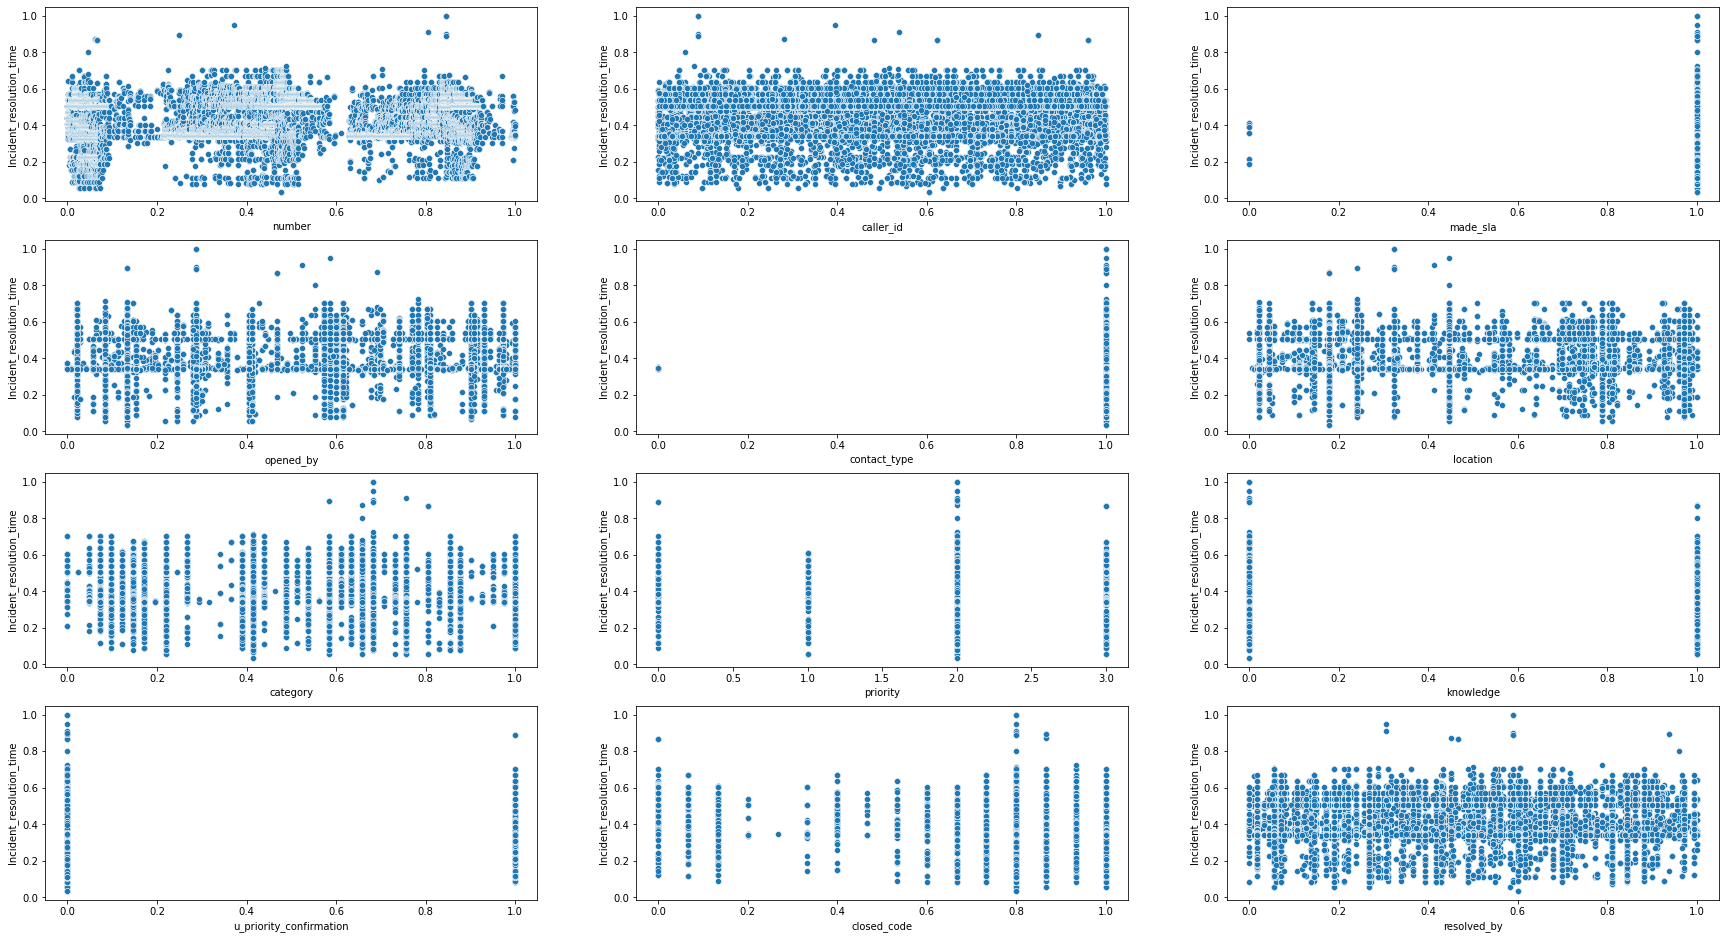

In [75]:
#Plot each feature against dependent variable
cols_to_plot= ['number','caller_id','made_sla','opened_by','contact_type','location', 'category','priority',
               'knowledge','u_priority_confirmation', 'closed_code','resolved_by']
count=1
plt.subplots(figsize=(30,25))
for i in cols_to_plot:
    plt.subplot(6,3,count)
    sns.scatterplot(df2_reg[i], df2_reg["Incident_resolution_time"])
    count+=1

plt.show()

In [77]:
X_reg = df2_reg.iloc[:,:-1]
y_reg = df2_reg.iloc[:,-1]

In [78]:
X_train, X_test, y_train, y_test= train_test_split(X_reg,y_reg,test_size=0.25)

In [79]:
regressor = DecisionTreeRegressor(random_state = 1)
regressor_model= regressor.fit(X_train,y_train)

In [80]:
#Test on the entire dataset
pred_values_DTR= regressor.predict(X_reg)

In [81]:
#Test on the entire dataset
accuracyscore= r2_score(y_reg,pred_values_DTR)
accuracyscore

0.8517135737331462

In [82]:
#Test on the entire dataset
mean_squared_error(y_reg, pred_values_DTR)

0.0014875697167654176

In [83]:
#Hyper parameter tuning for DecisionTreeRegressor
params_dtr = {"max_depth" : range(20,40),
              "min_samples_split": range(2,20),
           "min_samples_leaf":range(1,10),
           "max_leaf_nodes":range(1000,10000,1000),
           }

In [84]:
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = params_dtr, n_iter = 100, cv = 2, n_jobs = -1, scoring='r2')
result= rf_random.fit(X_train, y_train)
# summarize results
print("Best hyperparameters using %s" % (result.best_params_))

Best hyperparameters using {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_leaf_nodes': 3000, 'max_depth': 28}


In [85]:
min_samples_leaf_dtr= result.best_params_['min_samples_leaf']
max_depth_dtr= result.best_params_['max_depth']
max_leaf_nodes_dtr= result.best_params_['max_leaf_nodes']
min_samples_split_dtr= result.best_params_['min_samples_split']

In [86]:
#Tuned model
Tuned_regressor = DecisionTreeRegressor(min_samples_split= min_samples_split_dtr, max_leaf_nodes= max_leaf_nodes_dtr,min_samples_leaf= min_samples_leaf_dtr, max_depth= max_depth_dtr).fit(X_train,y_train)

In [87]:
#Test on the entire dataset
pred_values_DTR_tuned= Tuned_regressor.predict(X_reg)

In [88]:
#Test on the entire dataset
accuracyscore= r2_score(y_reg,pred_values_DTR_tuned)
accuracyscore

0.8277346863892094

In [89]:
#Test on the entire dataset
mean_squared_error(y_reg, pred_values_DTR_tuned)

0.0017281194929828195

In [90]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 45)
rf_model= rf.fit(X_train,y_train)
#Test on the entire dataset
pred_values_rf= rf.predict(X_reg)

In [91]:
#Test on the entire dataset
accuracyscore= r2_score(y_reg,pred_values_rf)
accuracyscore

0.8461555708966457

In [92]:
#Test on the entire dataset
mean_squared_error(y_reg, pred_values_rf)

0.0015433261127715872

In [93]:
#Hyper parameter tuning for RandomForestRegressor
params_rf = {"max_depth" : range(20,40),
           "min_samples_leaf":range(2,10),
           "max_leaf_nodes":range(1000,15000,1000),
           'ccp_alpha': alpha_vals}

In [94]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params_rf, n_iter = 100, cv = 2, n_jobs = -1, scoring='r2')
result= rf_random.fit(X_train, y_train)
# summarize results
print("Best: Hyperparameters using %s" % result.best_params_)

Best: Hyperparameters using {'min_samples_leaf': 2, 'max_leaf_nodes': 12000, 'max_depth': 37, 'ccp_alpha': 0.0}


In [95]:
min_samples_leaf_rf= result.best_params_['min_samples_leaf']
max_depth_rf= result.best_params_['max_depth']
ccp_alpha_rf= result.best_params_['ccp_alpha']
max_leaf_nodes_rf= result.best_params_['max_leaf_nodes']

In [96]:
#Tuned model
Tuned_rf = RandomForestRegressor(min_samples_leaf= min_samples_leaf_rf, max_depth= max_depth_rf,ccp_alpha= ccp_alpha_rf,max_leaf_nodes= max_leaf_nodes_rf,n_estimators = 10, random_state = 42).fit(X_train,y_train)
#Test on the entire dataset
pred_values_rf_tuned= Tuned_rf.predict(X_reg)

In [97]:
#Test on the entire dataset
accuracyscore= r2_score(y_reg,pred_values_rf_tuned)
accuracyscore

0.8291288472627034

In [98]:
#Test on the entire dataset
mean_squared_error(y_reg, pred_values_rf_tuned)

0.001714133644460334